In [1]:
import numpy as np
from scipy.optimize import minimize

import matplotlib.pyplot as plt

In [2]:
sample_num = 200
x = np.linspace(0, 20, num=sample_num)
w0, b0 = [3, 4]
bias = b0 + np.random.normal(size=sample_num)
y = w0 * x + bias

In [3]:
def error(args):
    w, b = args
    y_hat = w * x + b
    return np.sum(np.power(y - y_hat, 2))

In [4]:
wb0 = [0, 0]
ret = minimize(error, wb0)
print(ret)

      fun: 175.92902427544323
 hess_inv: array([[ 7.42537835e-05, -7.42538070e-04],
       [-7.42538070e-04,  9.92538412e-03]])
      jac: array([5.7220459e-06, 0.0000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([3.01053005, 3.86971532])


In [5]:
w, b = ret.x
y_pre = w * x + b
print('optimize linear regression arguments', w, b)

optimize linear regression arguments 3.010530054820426 3.8697153218893425


In [6]:
from numpy.linalg import inv

x0 = np.ones(x.size)
X = np.stack([x0, x], axis=1)

W = inv(X.T.dot(X)).dot(X.T).dot(y)
b_hat, w_hat = W
y_hat = w_hat * x + b_hat + 10
least_square_error = error([w_hat, b_hat])
print('least square linear regression arguments', w_hat, b_hat)

least square linear regression arguments 3.0105300831464006 3.8697150430558525


optimize error 175.92902427544323, least square error 175.92902427543788


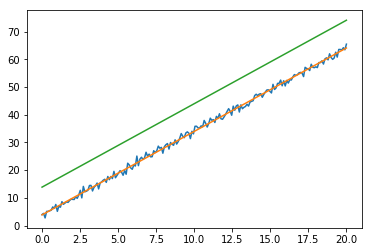

In [7]:
print(f'optimize error {ret.fun}, least square error {least_square_error}')
plt.plot(x, y, x, y_pre, x, y_hat)